[View in Colaboratory](https://colab.research.google.com/github/ShreyasJothish/ML-Precourse/blob/master/LSDS_Intro_Lecture_6_Linear_Algebra_2.ipynb)

###Objectives

Compute the “Least Squares Solution” of a linear regression

Solve equations simultaneously using matrix algebra

Represent equations in matrix form

##A review from yesterday:

What is the result of multplying these two matrices together?

$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} $
$ \begin{bmatrix} 5 &6 \\ 7&8 \end{bmatrix} $

We can break the second matrix up into two vectors and multiply the first matrix by each vector

$ \begin{bmatrix} 5 \\ 7 \end{bmatrix}$
$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$

$5 \begin{bmatrix} 1 \\ 3 \end{bmatrix} +$
 $7  \begin{bmatrix} 2 \\ 4 \end{bmatrix} =$ 
 
 $(5 \cdot 1) + (7\cdot 2) = 19$
 
 $(5 \cdot 3) + (7 \cdot 4) = 43$
 
 And now the 2nd column of the 2nd matrix
 
 $ \begin{bmatrix} 6 \\ 8 \end{bmatrix}$
$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$

$6 \begin{bmatrix} 1 \\ 3 \end{bmatrix} +$
 $8  \begin{bmatrix} 2 \\ 4 \end{bmatrix} =$ 
 
 $(6 \cdot 1) + (8\cdot 2) = 22$
 
 $(6 \cdot 3) + (8 \cdot 4) = 50$
 
 So the result is 
 $\begin{bmatrix} 19 & 22\\ 43 & 50 \end{bmatrix} $


Do you see the instances of dot product? 

$ \begin{bmatrix} 5 \\ 7 \end{bmatrix}$
$ \begin{bmatrix} 1 & 2\end{bmatrix} = 19$

$ \begin{bmatrix} 6 \\ 8 \end{bmatrix}$
$ \begin{bmatrix} 1 & 2\end{bmatrix} = 22$

$ \begin{bmatrix} 5 \\ 7 \end{bmatrix}$
$ \begin{bmatrix} 3 & 4\end{bmatrix} = 43$

$ \begin{bmatrix} 6 \\ 8\end{bmatrix}$
$ \begin{bmatrix} 3 & 4\end{bmatrix} = 50$

Matrix multiplication is easy to get confused in so practice helps build familiarity and comfort with...

But lets move into applications

Who remembers the formula for a line?

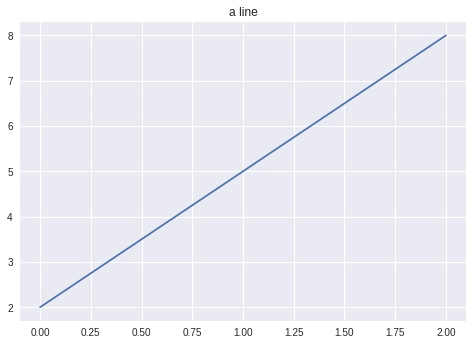

In [1]:
import matplotlib.pyplot as plt

x = [0, 1, 2]
m = 3
b = 2
y = [m*x + b for x in x]

plt.plot(x,y)
plt.title('a line')
plt.show()

# y = mx + b

### General Form:
2 = m(0) + b

5 = m(1) + b

8 = m(2) + b

### General Form with Slope and Intercept:
2 = 3(0) + 2

5 = 3(1) + 2

8 = 3(2) + 2

### Notice that I could actually represent this in vector form. 

  \begin{align}
      \begin{bmatrix}
           2\\
           5\\
           8
         \end{bmatrix}
         = 
         3   \begin{bmatrix}
           0\\
           1\\
           2
         \end{bmatrix}
         + 2 \begin{bmatrix}
           1\\
           1\\
           1
         \end{bmatrix}
  \end{align}
  ### It's scalar multiplication and vector addition just like we used yesterday.
  
  ### More generally we could write it as:
   \begin{align}
      \begin{bmatrix}
           y_{0}\\
           \vdots\\
           y_{n}
         \end{bmatrix}
         = 
         3   \begin{bmatrix}
           x_{0}\\
           \vdots\\
           x_{n}
         \end{bmatrix}
         + 2 \begin{bmatrix}
           1\\
           \vdots\\
           1
         \end{bmatrix}
  \end{align}
  
 ### What if I had two equations and I wanted to know where the lines intersect? 
  
  y = 3x+2
  
  y = -x  + 5
  
 ### How would I solve this algebraically? (the substitution method)
  
  3x +2 = -x + 5
  
  4x +2 = 5
  
  4x = 3
  
  x = .75
  
  y = -(.75) + 5
  
  y = 4.25
  
 ### So the two lines intersect at the coordinates of (.75, 4.25)

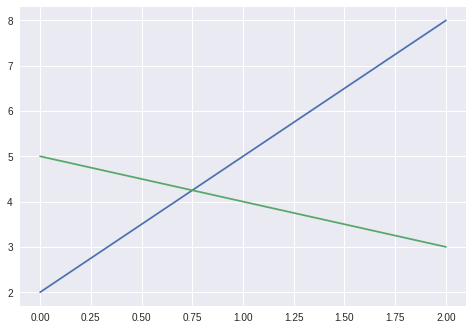

In [2]:
x = [0,1,2]
m = 3
b = 2
y = [m*x +b for x in x]

m_1 = -1
b_1 = 5
y_1 = [m_1*x +b_1 for x in x]

plt.plot(x,y)
plt.plot(x, y_1)
plt.show()

### We can also solve this using matrices.

### First, rewrite the equations so that the constant is on the right side of the equation

y = 3x+2 --> y - 3x = 2

y = -x + 5 --> y +x = 5

### Second put the coeffecients into a matrix and the variables and constants into vectors

  \begin{align}
      \begin{bmatrix}
           1\
           {-3}\\
           1\
           1
         \end{bmatrix}
         \begin{bmatrix}
           y\\
           x\\
         \end{bmatrix}
         = \begin{bmatrix}
           2\\
           5\\
         \end{bmatrix}
  \end{align}
  
 ### We've now put our equation in Ax = v form.
  
### From here we can create an augmented matrix
  
\begin{bmatrix}
  1 & -3 & 2\\
  1 & 1 & 5
\end{bmatrix}
 
 ### From here we can use *row reduction* or *Gaussian elimination* to solve.
 
 ### The goal here is to have 1s along the diagonal and 0s in the left triangle. It's hard to visualize with this example so we'll do another longer version after this one.
 
 The rules of the game are this:
 
 1) You can swap rows
 
 2) You can scale rows
 
 3) You can add rows
 
 ### I need to get a zero in the bottom left corner so, I'm going to multiply Row 1 by -1, add it to Row 2 and put the result in Row 2
 
 
 ### This action can be represented by -1(R1) + R2 => R2
 
 \begin{bmatrix}
  1 & -3 & 2\\
  0 & 4 & 3
\end{bmatrix}
  
 ### We can now rewrite this back into equation form as
 
 1y - 3x = 2
 
 &
 
 0y +4x = 3
 
 x = .75 
 
 y = 4.25
 
 ### That probably doesn't seem that exciting but what if the equations got more complicated with more variables?
 
 ### What if I had 3 equations and 3 variables?
 
 1x + 1y - 1z = 9
 
 0x+ 1y + 1z = 3
 
 -1x + 0y - 2z = 2
 
### Rewritten into Ax = v form...

 
 $\begin{bmatrix}
  1 & 1& -1\\
  0 & 1 & 1 \\
  -1 & 0 & -2
\end{bmatrix} \begin{bmatrix} x\\ y\\ z \end{bmatrix}
= \begin{bmatrix} 9 \\ 3 \\ 2 \end {bmatrix}$ 

Again we'll create the augmented matrix:
\begin{bmatrix}
  1 & 1 & -1 & 9\\
  0 & 1 & 1& 3 \\
  -1 & 0 & -2 & 2
\end{bmatrix}

### Now we get to play the row reduction game again! Remember, we want zeros in the lower left triangle and 1s along the diagonal.

### For my first move, I'm going to swap Row 2 and Row 3 and place the result in Row 3

\begin{bmatrix}
  1 & 1 & -1 & 9\\
  -1 & 0 & -2 & 2\\
   0 & 1 & 1& 3 
\end{bmatrix}


### Next, I'll add Row 1 and Row 2 and place the result in Row 2
\begin{bmatrix}
  1 & 1 & -1 & 9\\
  0 & 1 & -3 & 11\\
   0 & 1 & 1& 3 
\end{bmatrix}

### Now, I'll multiply Row 2 by negative 1 add it to Row 3 and place the result in Row 3
\begin{bmatrix}
  1 & 1 & -1 & 9\\
  0 & 1 & -3 & 11\\
   0 & 0 & 4& -8
\end{bmatrix}


### And finally to get the final 1 in the diagonal, I'll multiply Row 3 by 1/4 and place the result in Row 3
\begin{bmatrix}
  1 & 1 & -1 & 9\\
  0 & 1 & -3 & 11\\
   0 & 0 & 1& -2
\end{bmatrix}

### Now we can solve the equations:

x + y - z = 9

 y -3z = 11
      
 z = -2
            
  z = -2 so 
  y + 6 = 11
  
  y = 5
  
  x + 5 - (-2) = 9
  
  x + 7 = 9
  
  x = 2
  
 ### That means that these planes intersect at the point [2, 5,-2]
  
 ### That was a lot of work - let's do it in code now!

In [3]:
import numpy as np

A = np.matrix('1 1 -1; 0 1 1; -1 0 -2')
v = np.array([9,3,2])

x = np.linalg.solve(A,v)
print(x)

[ 2.  5. -2.]


### Awesome, we can solve series of equations with matrices! 

### But, what if we want to solve for coefficents and the points aren't on a single line... 

### Here's an example - I am a server at a restaurant and I want to estimate what my tip will be based off of the bill so I collect some data points

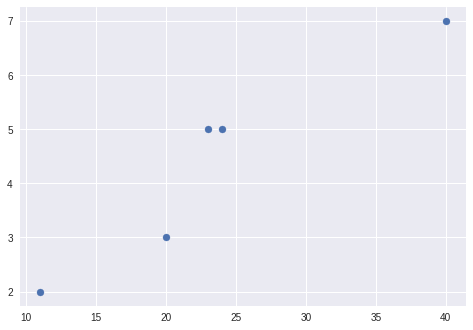

In [6]:
bill = [20, 24, 11, 23, 40]
tip = [3, 5, 2, 5, 7]

plt.scatter(bill, tip, marker = 'o')
plt.show()

### I want to find the line that will best estimate what the tip will be based off of the bill. 

### We return to y = mx+b

### But now we'll write it as 

$ {y} = \beta_o + \beta_1x + \epsilon$ 


$ \begin{bmatrix}
3\\
5\\
2\\
5\\
7 \end {bmatrix} = \beta_0 \begin{bmatrix}
1\\
1\\
1\\
1\\
1 \end {bmatrix}+ \beta_1
 \begin{bmatrix}
20\\
24\\
11\\
23\\
40 \end {bmatrix} $

### This can be rewritten in A(beta) = v form
$ \begin{bmatrix}
1 & 20\\
1 & 24\\
1 & 11\\
1 & 23\\
1 & 40\end{bmatrix}$
$
\begin{bmatrix}
{\beta_0}\\
{\beta_1}\end {bmatrix} =
\begin{bmatrix}
3\\
5\\
2\\
5\\
7 \end {bmatrix} 
$

### spoiler alert - this isn't actually solveable using row reduction. 



In [4]:
A_1 = np.matrix('1 20; 1 24; 1 11; 1 23; 1 40')

print(A_1)

v_1 = np.array([3,5,2,5,7])

beta = np.linalg.solve(A_1,v_1)
#ERROR

[[ 1 20]
 [ 1 24]
 [ 1 11]
 [ 1 23]
 [ 1 40]]


LinAlgError: ignored

This makes sense because if you look at the scatterpoint plot, you can see that there is no way that a single line can go through all 5 points. You could connect 2 points with a single line but not all 5.

So we have to project a line which will minimize the error between the projected point and the actual point.

<img src="https://docs.google.com/drawings/d/e/2PACX-1vR5kwrHi2V3bwRuP8U1tcw78zsTMqpx0WM4R5D7uiErWOr8hvCFfV2EUuVIoGxh2EPB9pfxwoUUfQmu/pub?w=960&amp;h=720">


Don't worry too much about this image - it's basically showing that the input matrix made up of the column vectors of matrix A creates the span of this plane. The vector v  [tips] is not in the span of this matrix and thus is shown as coming out of the plane. We want to minimize the error which is the distance between vector v and the projected vector.

Notice that the error vector is perpendictular or "orthoginal" to the projected vector. What is the dot product of two vectors which are orthoginal?

Zero!

So we can set up an equation as follows
 
 $\epsilon =  
 \begin{bmatrix}3\\5\\2\\5\\7 \end{bmatrix} -
\begin{bmatrix} 1 & 20\\ 1 & 24\\1 & 11\\1 & 23\\1 & 40\end{bmatrix}
\begin{bmatrix}
{\beta_0}\\
{\beta_1}
\end {bmatrix} 
$

(summarized as $\epsilon = v - A\beta$)

Remember that in order to find the vertical distance between the observed values and the predicted values, the dot-product of A-transpose and E must be 0.

 $ A^{T}\cdot \epsilon = 0$

$ A^{T} \cdot (v - A\beta) = 0$

Next we want to get $\beta$ on its own (remember we're trying to solve for the coefficents)
- Distribute $A^{T}$

$A^{T}v - A^{T}A\beta = 0$

- Move beta to the other side of the equation

$A^{T}v = A^{T}A\beta $

- To get beta by itself multiply both sides of the equation by $(A^{T}A)^{-1}$

$(A^{T}A)^{-1} A^{T}v =  (A^{T}A)^{-1}A^{T}A\beta $

- A matrix multipled by its inverse is the identity matrix which equals 1, So

$\beta = (A^{T}A)^{-1} A^{T}v$ 

We have our formula to calculate the beta values! 
(Don't worry if all of that was really confusing the formula is the more important part and we'll also use libraries to make it even simpler. )
(Check out this[ blog article](https://medium.com/@andrew.chamberlain/the-linear-algebra-view-of-least-squares-regression-f67044b7f39b) for more information on the linear algebra approach to least squares)

Let's code this out ~

In [8]:
A = np.matrix("1  20; 1  24; 1 11; 1 23; 1 40")
v = np.matrix("3; 5; 2; 5; 7")

A_transpose = np.transpose(A)
A_transpose_A = np.matmul(A_transpose, A)
inverse = np.linalg.inv(A_transpose_A)
v_A_transpose = np.matmul(A_transpose, v)
beta = np.matmul(inverse, v_A_transpose)

print(beta)

[[0.23844062]
 [0.17633726]]


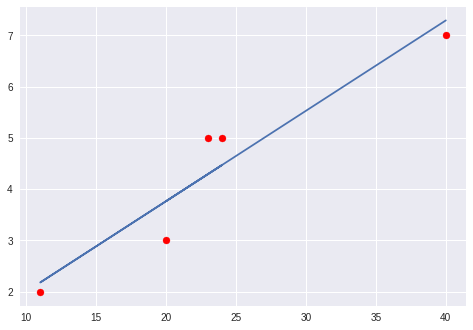

predicted values: [3.7651858567543073, 4.470534904805078, 2.1781504986400737, 4.294197642792385, 7.29193109700816]


In [9]:
# we have our beta values! So we can create a prediction line

beta_0 = beta[0,0]
beta_1 = beta[1,0]

bill = [20, 24, 11, 23, 40]
tip = [3, 5, 2, 5, 7]
y_hat = [beta_1*x + beta_0 for x in bill]
plt.scatter(bill, tip, marker = 'o', color = 'red')
plt.plot(bill, y_hat)
plt.show()

print("predicted values:", y_hat)


### We have library options as well, so we have even less to write!

In [10]:
lib_beta_0, lib_beta_1 = np.linalg.lstsq(A_1, v_1, rcond= None)[0]

print('lib_beta_0:',lib_beta_0)
print('lib_beta_1:', lib_beta_1)

lib_beta_0: 0.23844061650045226
lib_beta_1: 0.17633726201269273


## What if our data comes from a CSV or a Pandas Dataframe?
### Or should I say Pandas Matrix?

In [81]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ice_Cream_Sales.csv')
print(df.shape)
df.head(11)

(11, 2)


,Farenheit,Dollars
0,32,200
1,35,400
2,47,500
3,55,600
4,73,1100
5,78,1200
6,81,1500
7,86,1700
8,89,1800
9,90,1600


### The Dollars column will be our Y vector and our Farenheit column will be our X vector.
### Don't forget that we have to add a column of 1s to our X matrix in order to solve for the slope and intercept values correctly.

In [82]:
df['Ones'] = np.ones(11)

df.head(11)

,Farenheit,Dollars,Ones
0,32,200,1.0
1,35,400,1.0
2,47,500,1.0
3,55,600,1.0
4,73,1100,1.0
5,78,1200,1.0
6,81,1500,1.0
7,86,1700,1.0
8,89,1800,1.0
9,90,1600,1.0


In [83]:
X = df[['Ones', 'Farenheit']].as_matrix()

print(X)

[[  1.  32.]
 [  1.  35.]
 [  1.  47.]
 [  1.  55.]
 [  1.  73.]
 [  1.  78.]
 [  1.  81.]
 [  1.  86.]
 [  1.  89.]
 [  1.  90.]
 [  1. 110.]]


In [84]:
Y = df['Dollars'].as_matrix().reshape(-1, 1)

print(Y)

[[ 200]
 [ 400]
 [ 500]
 [ 600]
 [1100]
 [1200]
 [1500]
 [1700]
 [1800]
 [1600]
 [2000]]


### Use the Linear Regression Equation to solve for the correct beta values:
$\beta = (X^{T}X)^{-1} X^{T}Y$ 

### The first value in the beta array is the intercept value, and the second is the slope value

In [85]:
beta = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), Y))
                 
print(beta)

[[-596.20648399]
 [  24.68849397]]


### Use matplotlib to plot the points of the graph with the line of best fit included

Text(0.5,0,'Farenheit')

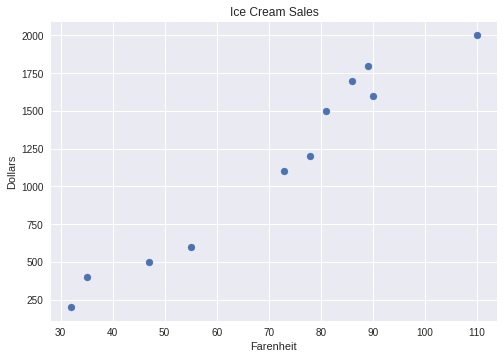

In [86]:
# Just the scatterplot
plt.scatter(df['Farenheit'], df['Dollars'])
plt.title("Ice Cream Sales")
plt.ylabel("Dollars")
plt.xlabel("Farenheit")

In [87]:
# Get your beta values out of the beta vector
beta_0 = beta[0,0]
beta_1 = beta[1,0]

print(beta_0)
print(beta_1)

-596.2064839942832
24.68849397414573


## Scatter Plot *WITH* the line of best fit

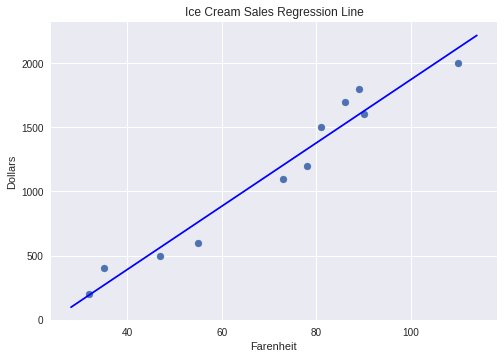

In [90]:
plt.scatter(df['Farenheit'], df['Dollars'])
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = beta_0 + beta_1 * x_vals
plt.plot(x_vals, y_vals, '-', color='b')
plt.title('Ice Cream Sales Regression Line')
plt.xlabel('Farenheit')
plt.ylabel('Dollars')
plt.show()

## Lets try it using a fancy machine learning library: Scikit-Learn

In [77]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

model = regr.fit(X, Y)

print(model.intercept_)
print(model.coef_)

[-596.20648399]
[[ 0.         24.68849397]]


<center>![XKCD Linear Algebra](https://imgs.xkcd.com/comics/machine_learning.png)</center>

# Simple Linear Regression
![Simple Linear Regression](http://www.ryanleeallred.com/wp-content/uploads/2018/08/simple-regression-formula.png)

# Linear Regression Diagram
<center>![Linear Regression Diagram](http://www.ryanleeallred.com/wp-content/uploads/2018/08/linear-regression-diagram.png)</center>

# Residual Values Diagram (Error or Epsilon)
<center>![Residual Values](http://www.ryanleeallred.com/wp-content/uploads/2018/10/residuals.png)</center>